<a href="https://colab.research.google.com/github/Aynahd/Y24/blob/main/Traffic_signs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'urban-and-rural-photos:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4427%2F24196%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240430%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240430T171424Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D0a609b4e1455654373e58d06abdbb0eb30fd19de78772a9038de0bd2c1e975b3e486c197c2d1d6bbcd1b83c4a66c0cdcf571114fb094649a97ec53f1fd38e642c0a3c94c62e38f135a81cbae473029679ddd46a849f75617226bbffa04ac630b99c2842e23900e20fd579e96fa5ddf679defe2908787f449506e30e5860cb168f52eddc6c813ee7b23e275315db30311f457cb7c0e3d81a1f427ffc86771a83939fd5e0165244484536b340a8a93b0f12984ce56e43da9d306635913d183aa63bb508073aa33c222cb3dcae078d448087d8a9b64e7b0082b874d8f8465e7a05b0a0dd3628072e2f32c4621dbe451b91f83fc747defb3978d4c1e0eb534edd873,resnet50:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F464180%2F872462%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240430%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240430T171424Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D592a8920e49c4de9db788cd7a29b6994ed09bd78321ae30ae920eae56c2b71167d4006a5b685f737ff24646f91e005d7b77aad9f974625540fda49b3d29062ac7f069e44c073124abbe79c560c0f8793becd5cce8e1dcb8804159d79b187d467d68de116c6005d788d83f9a4aafe73340412ddcbbcf1d996d89bd62b6da3f1d9889dc787a51ea5e3b039d4f8bebf3f364e4337c91e0d2c62df419046f4bfc6c9d3077fc41e8807d869c2aaa22ca070d76f8f5e5593f75b67b1b2a4c53fda978f9cd14977311debc5dcbdef7663172e749799900e5e8e526cf91eac940e01ba27ab1280cc2626813196f1b08355c4fa3ea3f3c163448cec3cfa8812cd9bac8755,traffic-sign-dataset-classification:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1794080%2F2952603%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240430%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240430T171424Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D9d9ee375323eca3e1e3fa047179aefb35c7890b3e575fed84742a66d8530375474f60c40f0f794613640a653cf8215b6eb63d7f23bb619a1958faaad5f6da4ce6a1312e95bf468c8e61d409fa018ee3a3a6ef07b9a180cd412b490e5c99d745c747686ac6dfc33902b716be085f7cc016fcd1b08e5b9ecb915490c20f157e900c593b223c9c54d147f1228f9b2d9532f535926327899e674f728b1c913753e3ad99ff77addfa848cdd8ce0d7e28d0e2ca6c88c62f2da0ea76e374b8aee3c2af82168d7c13d62750d396c35b6eef4cc76321978b84c1e8cce5c0dd3bfe18e5fe4428f370580e851b525b3af28d15e8176741e9599e3b4c986396e099009bd6032'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 6450132 bytes downloaded
Downloaded and uncompressed: urban-and-rural-photos
[==================================================] 182721880 bytes downloaded
Downloaded and uncompressed: resnet50
[==================================================] 199059936 bytes downloaded
Downloaded and uncompressed: traffic-sign-dataset-classification
Data source import complete.


In [4]:
#lib and generate random numbers each time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import os
import cv2
import random
from PIL import Image


import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from keras.layers import Dropout, Flatten, MaxPool2D,BatchNormalization
from keras.preprocessing import image
from tensorflow.keras.optimizers import Adam,SGD
import keras
from keras.preprocessing import image

seed=1
np.random.seed(seed)
tf.random.set_seed(seed)

In [5]:
# importing images
train_dir = "/kaggle/input/traffic-sign-dataset-classification/traffic_Data/DATA/"

# reading the csv file
labels = pd.read_csv("/kaggle/input/traffic-sign-dataset-classification/labels.csv")
labels

,ClassId,Name
0,0,Speed limit (5km/h)
1,1,Speed limit (15km/h)
2,2,Speed limit (30km/h)
3,3,Speed limit (40km/h)
4,4,Speed limit (50km/h)
5,5,Speed limit (60km/h)
6,6,Speed limit (70km/h)
7,7,speed limit (80km/h)
8,8,Dont Go straight or left
9,9,Dont Go straight or Right


In [6]:
# no. of images per label
lst = []
for i in labels.index:
    lst.append(len(os.listdir(train_dir + str(i))))
labels['count'] = lst
labels['count'].describe()

count     58.000000
mean      71.896552
std       83.818034
min        2.000000
25%       18.000000
50%       38.000000
75%      107.500000
max      446.000000
Name: count, dtype: float64

In [7]:
# only keep those with enough images in each label
labels = labels[labels['count'] >= 107.5]
labels

,ClassId,Name,count
0,0,Speed limit (5km/h),118
3,3,Speed limit (40km/h),260
5,5,Speed limit (60km/h),194
7,7,speed limit (80km/h),152
11,11,Dont Go Left,138
14,14,Dont overtake from Left,128
16,16,No Car,142
17,17,No horn,130
26,26,keep Right,126
28,28,watch out for cars,446


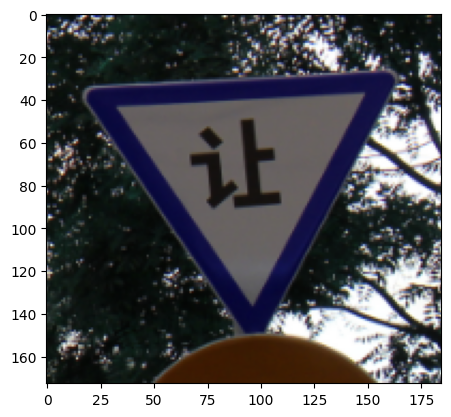

In [8]:
# finding the unknown image
fnames = os.listdir(train_dir + '56')
img = cv2.imread(train_dir + '56/' + fnames[3])
plt.imshow(img)

In [9]:
# renaming
labels.loc[56, "Name"] = "Yield"

labels["Name"] = ["Speed Limit 5", "Speed Limit 40",
       "Speed Limit 60", "Speed Limit 80", "No Left",
       "No Overtake from Left", "No Cars", "No Horn", "Keep Right",
       "Watch for Cars", "Bicycle Crossing", "Zebra Crossing",
       "No Stopping", "No Entry", "Yield"]

<ipython-input-9-b19fdb38591b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labels["Name"] = ["Speed Limit 5", "Speed Limit 40",


In [10]:
# set the image size
image_size = 128

# input and data augmentation
train_datagen = ImageDataGenerator(
        rescale = 1 / 255.,
        rotation_range=10,
        zoom_range=0.2,
        width_shift_range=0.1,
        height_shift_range=0.1,
        fill_mode="nearest",
        validation_split=0.25,
    )

train_generator = train_datagen.flow_from_directory(
    directory = train_dir,
    target_size = (image_size, image_size),
    batch_size = 28,
    shuffle=True,
    class_mode = "categorical",
    subset = "training"
)

validation_generator = train_datagen.flow_from_directory(
    directory = train_dir,
    target_size = (image_size, image_size),
    batch_size = 28,
    class_mode = "categorical",
    subset = "validation"
)

Found 3144 images belonging to 58 classes.
Found 1026 images belonging to 58 classes.


In [11]:
# set classes to number of categories and input weight paths
num_classes = 58
resnet_weights_path = '../input/resnet50/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'

# defining the model
model = Sequential()
model.trainable = True

model.add(ResNet50(include_top=False, pooling='avg', weights= resnet_weights_path))
model.add(BatchNormalization())
model.add(Dense(48, activation='relu'))
model.add(Dropout(0.25))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 batch_normalization (Batch  (None, 2048)              8192      
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 48)                98352     
                                                                 
 dropout (Dropout)           (None, 48)                0         
                                                                 
 batch_normalization_1 (Bat  (None, 48)                192       
 chNormalization)                                                
                                                                 
 dense_1 (Dense)             (None, 128)               6

In [12]:
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])

Network 1 - hyperparameters:
stochastic gradient descent optimizer;
categorical cross entropy loss;
accuracy metric;
relu, relu, softmax;
20 * 5 epochs

In [13]:
history = model.fit(
        train_generator,
        steps_per_epoch= 20,
        epochs = 5,
        validation_data=validation_generator,
        validation_steps=5)

Epoch 1/5
20/20 [==============================] - 172s 8s/step - loss: 3.7132 - accuracy: 0.1518 - val_loss: 4.0799 - val_accuracy: 0.0000e+00
Epoch 2/5
20/20 [==============================] - 153s 8s/step - loss: 3.0010 - accuracy: 0.4125 - val_loss: 3.9714 - val_accuracy: 0.1214
Epoch 3/5
20/20 [==============================] - 151s 8s/step - loss: 2.6528 - accuracy: 0.5036 - val_loss: 3.9922 - val_accuracy: 0.0429
Epoch 4/5
20/20 [==============================] - 157s 8s/step - loss: 2.3766 - accuracy: 0.5804 - val_loss: 4.1404 - val_accuracy: 0.0571
Epoch 5/5
20/20 [==============================] - 153s 8s/step - loss: 2.2882 - accuracy: 0.5518 - val_loss: 4.4640 - val_accuracy: 0.0286


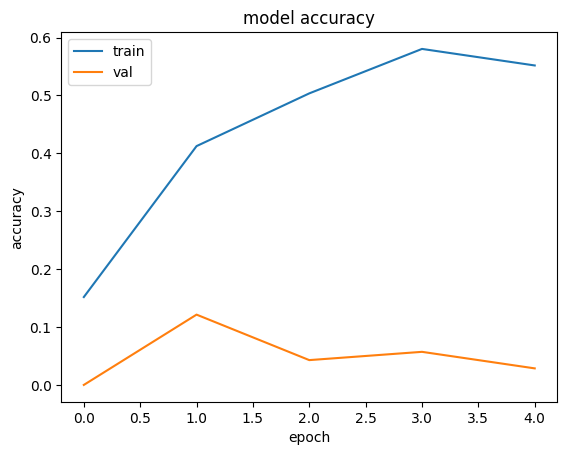

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

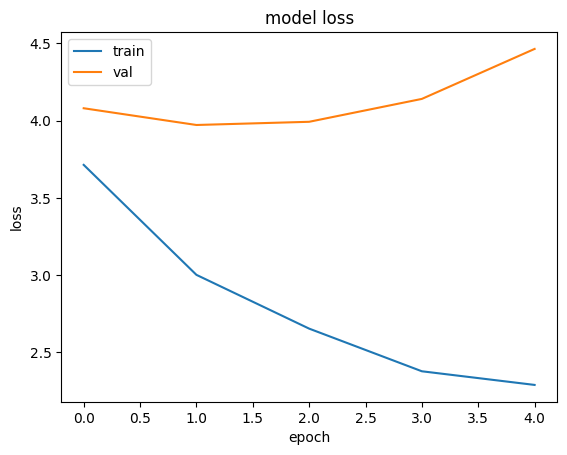

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Network 2-hyperparameters: increased layers; relu and softmax activation functions;adam optimizer; categorical cross entropy; 40*10 epochs

In [16]:
# define the model
model2 = Sequential()
model2.trainable = True

model2.add(ResNet50(include_top=False, pooling='avg', weights= resnet_weights_path))
model2.add(BatchNormalization())
model2.add(Dense(48, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dense(256, activation='relu'))
model2.add(Dropout(0.25))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(num_classes, activation='softmax'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 batch_normalization_2 (Bat  (None, 2048)              8192      
 chNormalization)                                                
                                                                 
 dense_3 (Dense)             (None, 48)                98352     
                                                                 
 batch_normalization_3 (Bat  (None, 48)                192       
 chNormalization)                                                
                                                                 
 dense_4 (Dense)             (None, 256)               12544     
                                                                 
 dropout_1 (Dropout)         (None, 256)              

In [17]:
model2.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
# tuning to try to improve the score
history2 = model2.fit(
        train_generator,
        steps_per_epoch= 40,
        epochs = 10,
        validation_data=validation_generator,
        validation_steps=7)

Epoch 1/10
40/40 [==============================] - 346s 8s/step - loss: 2.7352 - accuracy: 0.3955 - val_loss: 25.8411 - val_accuracy: 0.0459
Epoch 2/10
40/40 [==============================] - 312s 8s/step - loss: 1.6412 - accuracy: 0.6009 - val_loss: 11.9732 - val_accuracy: 0.0306
Epoch 3/10
40/40 [==============================] - 304s 8s/step - loss: 1.3282 - accuracy: 0.6473 - val_loss: 4.3590 - val_accuracy: 0.0000e+00
Epoch 4/10
40/40 [==============================] - 313s 8s/step - loss: 1.0552 - accuracy: 0.6982 - val_loss: 6.6416 - val_accuracy: 0.0510
Epoch 5/10
40/40 [==============================] - 311s 8s/step - loss: 0.8349 - accuracy: 0.7580 - val_loss: 25.7555 - val_accuracy: 0.0459
Epoch 6/10
40/40 [==============================] - 316s 8s/step - loss: 0.7507 - accuracy: 0.7866 - val_loss: 14.9087 - val_accuracy: 0.0663
Epoch 7/10
40/40 [==============================] - 325s 8s/step - loss: 0.6303 - accuracy: 0.8259 - val_loss: 5.1902 - val_accuracy: 0.0102
Epoch

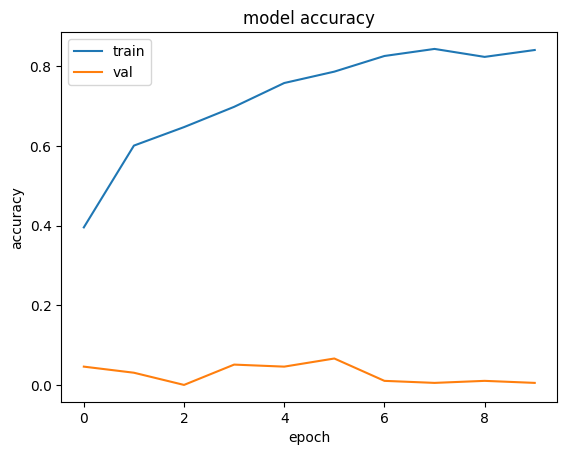

In [19]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()